# p-value calculation from Normal Distribution

* [p-value calculation method](https://stats.stackexchange.com/questions/543925)
* [Hypothesis Testing in Finance: Concept and Examples](https://www.investopedia.com/articles/active-trading/092214/hypothesis-testing-finance-concept-examples.asp)

In [1]:
import random
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

# HDD MTTF distribution

<img src="image/what_is_p_value.jpg" aligh="left"/>

In [15]:
H0 = np.array([-1] * 2500 + [1] * 2500 + [0] * 95000)
np.random.shuffle(H0)

u = np.mean(H0)
sd = np.std(H0)
print(f"mean {u:.5f} std {sd:.5f}")

mean 0.00000 std 0.22361


# ND from Sampling Means from H0

Based on the CLT, sampling means forms a ND where 

* mean $\overline {\mu} = \mu$
* sd $\overline {\sigma} = \sigma / \sqrt { n}$ 

(```n``` is the sample size, $\sigma$ is the standard deviation of the original distribution)

* [Kahn Academy - Standard Error of the Mean](https://youtu.be/J1twbrHel3o?t=438)

<img src="image/sd_of_clt_nd.png" align="left" width=600/>

In [3]:
n = 100

expected_su = u
expected_ssd = sd / np.sqrt(n)
print(f"Expected mean and SD of the sampling ND: su {expected_su} ssd {expected_ssd}")

Expected mean and SD of the sampling ND: su 0.0 ssd 0.022360679774997897


$\sigma$ $\mu$


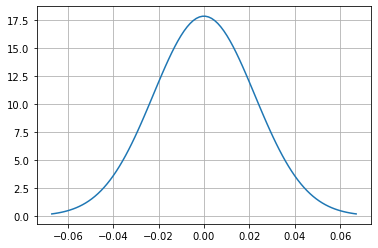

In [4]:
p = scipy.stats.norm(loc=expected_su, scale=expected_ssd)

x = np.linspace(expected_su - 3*expected_ssd, expected_su + 3*expected_ssd, 100)
plt.plot(x, p.pdf(x))
plt.grid()

In [5]:
at_two_sigma = expected_su + 2 * expected_ssd
print(f"value at 2σ {at_two_sigma} cdf at 2σ {p.cdf(at_two_sigma)} p-value at 2σ {1-p.cdf(at_two_sigma)}")

value at 2σ 0.044721359549995794 cdf at 2σ 0.9772498680518208 p-value at 2σ 0.02275013194817921


# p-value $P(3.2|H_0)$

## Theoretical p-value from ND CDF

Expected p-value as CDF of the The theoretical Normal Distributon from the samplings is $ND(\overline {\mu}, \overline {\sigma})$

In [6]:
p.cdf(np.inf)

1.0

In [7]:
def p_value(m):
    return 1 - p.cdf(m)

In [14]:
p_value(0.05)

0.0126736593387341

# p-value from the samplings

In [10]:
def sample_means(D, n=100, N = 10000):
    """Reapeat N times of taking a sample of size n from D 
    Args:
        D: Distribution
        n: sample size
        N: Number of repeats to take sample
    """
    means = []
    for i in range(N):
        means.append(np.mean(np.random.choice(a=D, size=n, replace=False)))
    return np.array(means)

In [11]:
means = sample_means(H0, N=10000, n=100)

In [12]:
su = np.mean(means)
ssd = np.std(means)
print(f"sampled: mean {su:.2f} sd {ssd:.2f}")

sampled: mean -0.00 sd 0.02


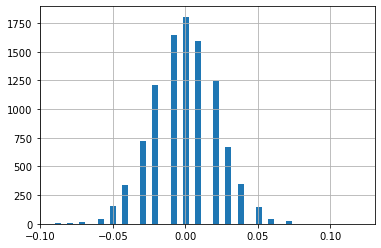

In [13]:
plt.hist(means, bins=50)
plt.grid()

In [18]:
means[(means >= 3.216)].size / means.size

0.055493